In this file, the goal is to plot the reconstruction error and the umap projection of the latent space includings the dataset PEPR_Marseille

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap
import seaborn as sns
from statannotations.Annotator import Annotator

/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Read all the necessary files

In [2]:
Embeddings_ukb = pd.read_csv("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/Embeddings.csv")
error_ukb = pd.read_csv("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/Reconstruction_error.csv")

Embeddings_hcp = pd.read_csv("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/hcp/Embeddings.csv")
error_hcp = pd.read_csv("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/hcp/Reconstruction_error.csv")

Embeddings_PBS = pd.read_csv("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/epilepsy_PBS/Embeddings.csv")
error_PBS= pd.read_csv("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/epilepsy_PBS/Reconstruction_error.csv")

Embeddings_PEPR= pd.read_csv("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/PEPR_Marseille/Embeddings.csv")
error_PEPR= pd.read_csv("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/PEPR_Marseille/Reconstruction_error.csv")

In [3]:
error_PEPR.loc[1011]

Unnamed: 0    0248GRE_19112019
0                  2044.368042
Name: 1011, dtype: object

In [7]:
error_PEPR

,Unnamed: 0,0
0,0001BAR_27112016,2398.638672
1,0001BUC_17062014,3461.456299
2,0001FLO_02052012,3145.983887
3,0001FRE_16032015,2839.419434
4,0001GRE_25112014,3589.877930
...,...,...
1030,0269GRE_07122021,4711.532715
1031,0270GRE_22012022,4372.996582
1032,0271GRE_19012022,3350.373291
1033,0272GRE_22032022,3720.735596


In [21]:
Embeddings_PEPR

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,65,66,67,68,69,70,71,72,73,74
0,0001BAR_27112016,-0.390614,1.511330,1.057066,1.022613,1.930695,-0.451010,0.922303,-0.239771,1.291787,...,-0.764253,-1.401212,-1.107217,-0.829081,0.823635,0.441134,-0.508561,0.612322,-0.107034,0.749156
1,0001BUC_17062014,1.925657,0.068373,1.542218,0.298947,0.088145,-0.110487,2.373637,-1.684521,1.732344,...,-0.027270,-0.394410,-0.984506,-0.421579,0.883263,-0.910370,0.186088,1.794355,0.852030,-0.870997
2,0001FLO_02052012,0.474533,1.061723,2.813114,-0.933890,0.757627,0.544543,0.860511,-0.707014,-1.730873,...,1.249896,0.021585,-0.455149,-0.740921,-0.768741,-1.340025,-1.175356,0.973898,-0.950265,0.926083
3,0001FRE_16032015,-0.038481,1.208947,1.820066,0.515087,1.797392,-0.326161,2.535587,0.624338,-0.543134,...,0.771567,1.058808,-1.081482,0.754602,0.803296,0.711427,0.169804,0.422570,-1.100561,0.263338
4,0001GRE_25112014,1.364369,1.632804,2.213619,-1.113454,0.536146,1.783927,-0.987761,0.373705,1.579596,...,0.440091,-0.521739,-0.121463,0.757254,-0.773127,0.915872,-1.986765,-0.204129,-2.118142,0.353635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,0269GRE_07122021,1.438591,2.086317,1.466037,0.961117,-0.023250,0.326312,0.849242,0.114999,1.264626,...,-0.474322,-0.442523,-0.542343,0.771599,0.455436,-0.454218,0.026769,1.214587,0.184996,1.251249
1031,0270GRE_22012022,1.127703,2.618143,3.351808,-1.955639,2.079436,0.612869,3.169273,-1.525557,0.000259,...,0.075655,-0.477119,-1.155346,-0.410281,1.468909,-0.142693,0.622915,0.999847,-0.956079,0.046788
1032,0271GRE_19012022,1.598462,0.836920,1.812735,0.082792,2.037747,0.854092,0.784027,-0.266921,0.548590,...,0.570122,1.261892,-1.439664,-0.448968,0.758088,1.800211,0.326018,1.037809,-0.011652,1.491121
1033,0272GRE_22032022,2.161265,2.395417,3.018074,-1.564524,0.328144,-0.782967,2.483384,-0.409258,1.218759,...,-0.841391,1.227789,0.759915,1.246252,1.669434,1.421726,-1.236591,1.442835,-1.139016,2.144651


In [14]:
error_PEPR= error_PEPR.set_index(error_PEPR.columns[0])

In [20]:
error_PEPR.loc['0001BAR_27112016']

0    2398.638672
Name: 0001BAR_27112016, dtype: float64

In [8]:
error_ukb

,Unnamed: 0,0
0,1000021,2726.425293
1,1000325,2984.175293
2,1000458,3312.738281
3,1000575,2973.837402
4,1000606,3103.183594
...,...,...
42428,6023847,2857.341064
42429,6024038,3087.666016
42430,6024150,2652.197021
42431,6024379,2993.993652


In [10]:
error_ukb = error_ukb.set_index(error_ukb.columns[0])

In [13]:
error_ukb.loc[1000021]

0    2726.425293
Name: 1000021, dtype: float64

In [9]:
error_hcp

,Unnamed: 0,0
0,100206,4361.577148
1,100307,2790.406006
2,100408,2865.013672
3,100610,2966.909180
4,101006,2957.589844
...,...,...
1109,992774,3208.058350
1110,993675,2998.156738
1111,994273,3036.695557
1112,995174,2718.952637


In [4]:
len(Embeddings_PEPR)

1035

In [3]:
Participants_epilepsy=pd.read_csv("/neurospin/dico/data/human/epilepsy_PBS/participants.tsv", sep="\t")

In [4]:
epilepsy_controls= Participants_epilepsy[Participants_epilepsy["Diagnosis"]=="controls"]

In [5]:
#We rename the first colomn 

error_PBS= error_PBS.rename(columns={error_PBS.columns[0]: "Index"})
Embeddings_PBS  = Embeddings_PBS.rename(columns={Embeddings_PBS.columns[0]: "Index"})

In [6]:
error_controls =error_PBS.merge(epilepsy_controls[["Index"]], on="Index", how="inner")

Embeddings_controls = Embeddings_PBS.merge(epilepsy_controls[["Index"]], on="Index", how="inner")

Histogramme des erreurs de reconstruction (cross entropy loss)

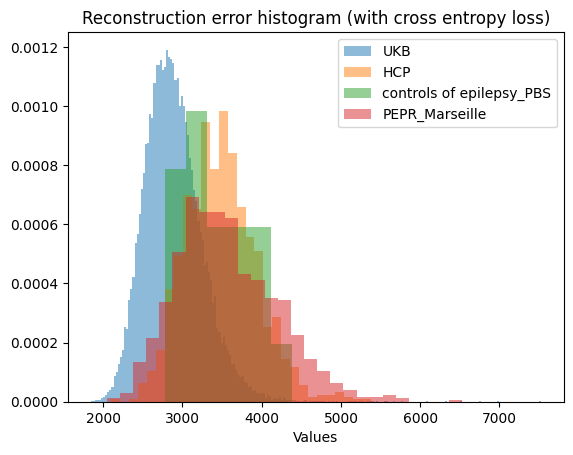

In [10]:
plt.hist(error_ukb.iloc[:,1], bins="auto", alpha=0.5, label="UKB", density=True)
plt.hist(error_hcp.iloc[:,1], bins="auto", alpha=0.5, label="HCP", density=True)
plt.hist(error_controls.iloc[:,1], bins="auto", alpha=0.5, label="controls of epilepsy_PBS", density=True)
plt.hist(error_PEPR.iloc[:,1], bins="auto", alpha=0.5, label="PEPR_Marseille",density=True)

plt.xlabel("Values")

plt.title("Reconstruction error histogram (with cross entropy loss)")
plt.legend()
plt.show()

Latent space

In [11]:
X1 = Embeddings_ukb.iloc[:,1:76] #We remove de first column because it represents the id
                                 #1:76 because there are 75 components
X2= Embeddings_hcp.iloc[:,1:76]
X3= Embeddings_controls.iloc[:,1:76]
X4= Embeddings_PEPR.iloc[:,1:76] 

In [14]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
X2 = scaler.transform(X2)
X3 = scaler.transform(X3)
X4 = scaler.transform(X4)

In [17]:
reducer = umap.UMAP(n_components=2, random_state=42)
X1_umap= reducer.fit_transform(X1)
X2_umap = reducer.transform(X2)
X3_umap= reducer.transform(X3)
X4_umap=reducer.transform(X4)

/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


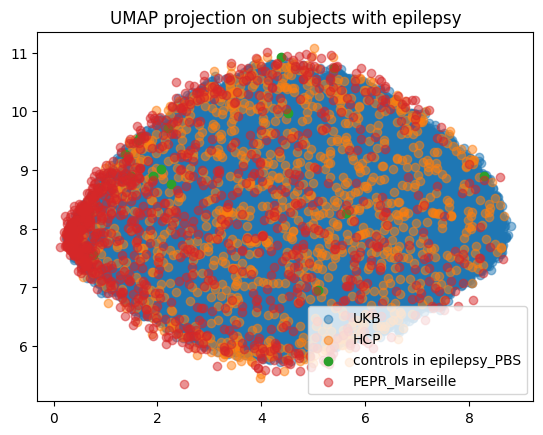

In [18]:
plt.scatter(X1_umap[:,0], X1_umap[:,1], label="UKB", alpha=0.5)
plt.scatter(X2_umap[:,0], X2_umap[:,1], label="HCP", alpha=0.5)
plt.scatter(X3_umap[:,0], X3_umap[:,1], label="controls in epilepsy_PBS")
plt.scatter(X4_umap[:,0], X4_umap[:,1], label="PEPR_Marseille", alpha=0.5)

plt.title("UMAP projection on subjects with epilepsy")
plt.legend()
plt.show()

Mann-Whithney test

In [19]:
error_ukb= error_ukb.iloc[:,1]
error_hcp= error_hcp.iloc[:,1]
error_controls= error_controls.iloc[:,1]
error_PEPR= error_PEPR.iloc[:,1]

In [20]:
Reconstruc_error_UKB= pd.DataFrame({
    'database': 'UKB',
    'Reconstruc_error': error_ukb
})

Reconstruc_error_HCP= pd.DataFrame({
    'database': 'HCP',
    'Reconstruc_error': error_hcp
})

Reconstruc_error_controls=pd.DataFrame({
    'database': 'controls',
    'Reconstruc_error': error_controls
})

Reconstruc_error_PEPR=pd.DataFrame({
    'database': 'PEPR_Marseille',
    'Reconstruc_error': error_PEPR
})

In [21]:
Reconstruct_error= pd.concat([Reconstruc_error_UKB,Reconstruc_error_HCP,Reconstruc_error_controls,Reconstruc_error_PEPR ], ignore_index=True)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

UKB vs. HCP: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=6.757e+06
controls vs. PEPR_Marseille: Mann-Whitney-Wilcoxon test two-sided, P_val:5.464e-01 U_stat=9.039e+03
HCP vs. PEPR_Marseille: Mann-Whitney-Wilcoxon test two-sided, P_val:7.266e-02 U_stat=5.507e+05
UKB vs. PEPR_Marseille: Mann-Whitney-Wilcoxon test two-sided, P_val:2.367e-287 U_stat=7.510e+06


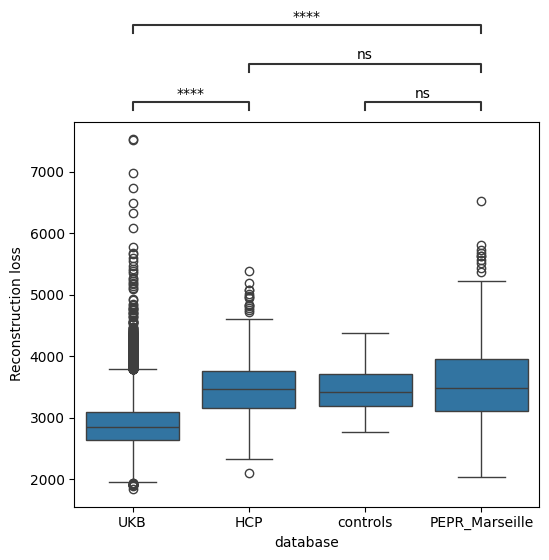

In [23]:

plt.figure(figsize=(6,5))
ax=sns.boxplot(x="database", y="Reconstruc_error", data=Reconstruct_error)

pairs = [("UKB", "HCP"), ("UKB", "PEPR_Marseille"),("HCP", "PEPR_Marseille"), ("controls", "PEPR_Marseille")]

annotator = Annotator(ax, pairs, data=Reconstruct_error, x="database", y="Reconstruc_error")
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside")
annotator.apply_test().annotate()

plt.ylabel("Reconstruction loss")
plt.show()

Chamfer distance

In [31]:
from scipy.ndimage import distance_transform_edt

In [25]:
input_ukb = np.load("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/inputs.npy")
output_ukb= np.load("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/outputs.npy")

input_hcp = np.load("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/hcp/inputs.npy")
output_hcp= np.load("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/hcp/outputs.npy")

input_PBS = np.load("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/epilepsy_PBS/inputs.npy")
output_PBS=np.load("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/epilepsy_PBS/outputs.npy")

input_PEPR= np.load("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/PEPR_Marseille/inputs.npy")
output_PEPR=np.load("/neurospin/tmp/fred/models/2025-11-10/SC-sylv_right_UKB_16-20-03_123/PEPR_Marseille/outputs.npy")

In [26]:
mask= np.load("/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/crops/2mm/S.C.-sylv./mask/Rmask.npy")
mask= mask[:,:,:,0]

In [27]:
input_ukb = input_ukb[:,0,:,:,:]
input_hcp = input_hcp[:,0,:,:,:]
input_PBS = input_PBS[:,0,:,:,:]
input_PEPR= input_PEPR[:,0,:,:,:]

output_ukb=output_ukb[:,1,:,:,:]
output_hcp=output_hcp[:,1,:,:,:]
output_PBS=output_PBS[:,1,:,:,:]
output_PEPR=output_PEPR[:,1,:,:,:]

In [28]:
mask = mask.astype(int)

In [29]:
target_shape = input_ukb[0].shape

pad_width = [(0, t - s) for s, t in zip(mask.shape, target_shape)]

mask = np.pad(mask, pad_width, mode='constant', constant_values=0)
mask.shape

(52, 40, 56)

In [30]:
input_control = input_PBS[0:19,:,:,:]
output_control=output_PBS[0:19,:,:,:]

In [32]:
def edge_distance_kernel(mask, distance_threshold=5.0, sigma=2.0):
    """
    Compute a spatial weighting kernel emphasizing the center of a binary mask.
    Inside the mask:
      - Weights = 1 for pixels farther than `distance_threshold` from the edge.
      - Weights = Gaussian decay for pixels within `distance_threshold` of the edge.
    Outside the mask:
      - Weights = 0.
    Parameters
    ----------
    mask : np.ndarray
        2D or 3D binary mask defining the valid region (1 inside, 0 outside).
    distance_threshold : float
        Distance (in pixels/voxels) from the mask edge above which weight = 1.
    sigma : float
        Gaussian falloff width (controls how fast the weight decays near edges).
    Returns
    -------
    kernel : np.ndarray
        Weight map of same shape as `mask`, values in [0,1].
    """
    assert mask.ndim in (2, 3), "mask must be 2D or 3D"
    mask = (mask > 0).astype(np.uint8)
    # Compute distance to the nearest 0 (edge)
    dist_inside = distance_transform_edt(mask)
    # Gaussian decay near the edge
    kernel = np.ones_like(mask, dtype=float)
    near_edge = dist_inside < distance_threshold
    kernel[near_edge] = np.exp(-((distance_threshold - dist_inside[near_edge]) ** 2) / (2 * sigma ** 2))
    # Zero weight outside the mask
    kernel[mask == 0] = 0.0
    return kernel

In [33]:
def chamfer_sweep_weighted(
    binary,
    reconstruction,
    threshold,
    kernel=None,
    two_sided=True
):
    """
    Compute weighted Chamfer distance between a binary mask and thresholded
    reconstructions over a range of thresholds.
    Parameters
    ----------
    binary : np.ndarray
        2D or 3D binary ground truth (0/1).
    reconstruction : np.ndarray
        2D or 3D continuous reconstruction in [0,1].
    kernel : np.ndarray or None
        Weighting map of same shape as input. If None, use uniform weights = 1.
    two_sided : bool
        Whether to compute symmetric Chamfer (True) or one-sided (False).
    local_window : int or None
        If None, returns mean error per threshold (scalar).
        If int, compute the sum of weighted error in each valid window
        (no padding) and take the maximum as the score.
    """
    assert binary.shape == reconstruction.shape, "Shapes must match"
    assert binary.ndim in (2, 3), "Supports only 2D or 3D arrays"
    binary = (binary > 0.5).astype(np.uint8)
    if kernel is None:
        kernel = np.ones_like(binary, dtype=float)
    else:
        assert kernel.shape == binary.shape, "Kernel must have same shape as input"
    dist_bin = distance_transform_edt(1 - binary)


    recon_bin = (reconstruction > threshold).astype(np.uint8)
    dist_recon = distance_transform_edt(1 - recon_bin)
    if two_sided:
        error_map = binary * dist_recon + recon_bin * dist_bin
    else:
        error_map = recon_bin * dist_bin
    weighted_error = error_map * kernel

    chamfer_score = weighted_error.mean()

    return chamfer_score

In [34]:
kernel = edge_distance_kernel(mask)

In [38]:
def compute_chamfer_and_thresold(inputs, outputs, thresholds):
    chamfer = []
    best_thresholds= []

    for i in range (inputs.shape[0]):
        print(i)
        partial_chamfer= []
        for t in thresholds:
            a = chamfer_sweep_weighted(inputs[i,:,:,:], outputs[i,:,:,:], t, kernel)
            partial_chamfer.append(a)
        partial_chamfer= np.array(partial_chamfer)
        j = np.argmin(partial_chamfer)

        chamfer.append(partial_chamfer[j])
        best_thresholds.append(thresholds[j])

    return best_thresholds,chamfer
        

In [36]:
thresholds= np.arange(0, 1.05, 0.05)

In [39]:
t_ukb, chamfer_ukb = compute_chamfer_and_thresold(input_ukb, output_ukb, thresholds)
print("hcp")
t_hcp, chamfer_hcp = compute_chamfer_and_thresold(input_hcp, output_hcp, thresholds)
print("controls")
t_cont,chamfer_cont= compute_chamfer_and_thresold(input_control, output_control, thresholds)
print("PEPR_Marseille")
t_PEPR,chamfer_PEPR= compute_chamfer_and_thresold(input_PEPR,output_PEPR,thresholds)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

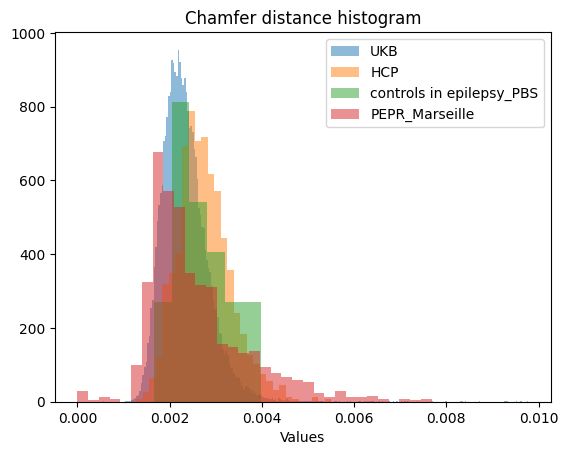

In [41]:
plt.hist(chamfer_ukb, bins="auto", alpha=0.5, label="UKB", density=True)
plt.hist(chamfer_hcp, bins="auto", alpha=0.5, label="HCP", density=True)
plt.hist(chamfer_cont, bins="auto", alpha=0.5, label="controls in epilepsy_PBS", density=True)
plt.hist(chamfer_PEPR, bins="auto", alpha=0.5, label="PEPR_Marseille",density=True)

plt.xlabel("Values")

plt.title("Chamfer distance histogram")
plt.legend()
plt.show()

In [50]:
np.array(t_PEPR).mean()

np.float64(0.6376328502415459)